# LAB 1. Знакомство с Jupyter Notebook

## Useful imports

In [1]:
import pandas as pd
import numpy as np
import math
import tabulate
import random
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import HTML, display
from collections import defaultdict
from typing import List

## Reading datasets

In [2]:
def mean(values: List[float | int]):
    if not values:
        return None

    return sum([key * value / len(values) for key, value in Counter(values).items()])

def variance(values: List[float | int]):
    
    return math.sqrt(mean([s ** 2 for s in values]) - mean(values) ** 2)

In [3]:
data_sets_files = ["set_1.csv", "set_2.csv", "set_3.csv"]

def remove_spreads(data: list[int | float]) -> list[int | float]:
    sigma: float = variance(data)

    return list(filter(lambda x: -3 * sigma < x and x < 3 * sigma, data))

data_sets = [remove_spreads(pd.read_csv(filename, header=None).values.flatten().tolist()) for filename in data_sets_files]


## Universal function for creating histograms for datasets

In [4]:
def plotting_dataset(dataset: List[float] | List[int], bins_count: int, data_percent: float, data_set_name: str = None):
    
    N = len(dataset)
    n = math.ceil(1 + 1.14 * math.log(N))
    
    min_val = min(dataset)
    max_val = max(dataset)
    
    step = (max_val - min_val) / n

    intervals = defaultdict(int)
    
    for val in dataset:
        index = math.ceil((val - min_val) / step)
        intervals[index] += 1

    keys = sorted(intervals.keys())
    intervals = {key: intervals[key] for key in sorted(intervals)}
    
    for val in keys:
        if intervals[val] / N < data_percent:
            intervals.pop(val)

    keys = sorted(intervals.keys())

    max_val = keys[len(keys) - 1] * step + min_val
    min_val = keys[0] * step + min_val

    plt.hist([val for val in dataset if val <= max_val and val >= min_val], bins=bins_count, color="red", edgecolor="black", linewidth=1.2)

    plt.title(f"Histogram {data_set_name}")
    plt.xlabel("Values")
    plt.ylabel("Numbers")


### Plotting datasets

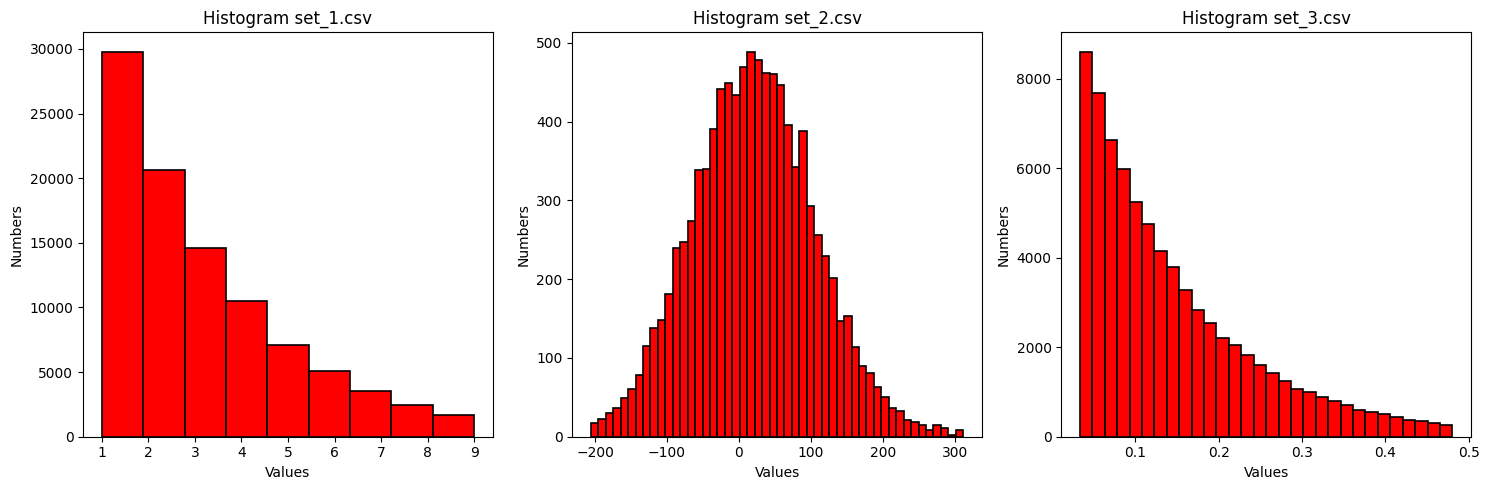

In [5]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plotting_dataset(data_sets[0], 9, 0.015, data_sets_files[0])
plt.subplot(1, 3, 2)
plotting_dataset(data_sets[1], 50, 0.001, data_sets_files[1])
plt.subplot(1, 3, 3)
plotting_dataset(data_sets[2], 30, 0.01, data_sets_files[2])
plt.tight_layout()

plt.show()

In [10]:
means = [mean(data_set) for data_set in data_sets]

variances = [variance(data_set) for data_set in data_sets]

table = tabulate.tabulate([el for el in zip(data_sets_files, means, variances)], tablefmt='html', headers=["Mean", "Variance"])
display(HTML(table))


,Mean,Variance
set_1.csv,2.96164,2.05808
set_2.csv,20.083,86.158
set_3.csv,0.113994,0.102216


In [9]:
def geometric_distribution(mean: float, variance: float, size: int, data_set_name: str):
    try:
        p = mean / variance ** 2
        plt.hist(np.random.geometric(p, size), bins=30, density=True, alpha=0.5, color='g', edgecolor='black')
    except Exception as e:
        print(f"Cannot create plot: {e}")
    finally:
        plt.xlabel('Values')
        plt.ylabel('Numbers')
        plt.title(f'Geometric for {data_set_name}')
        plt.show()


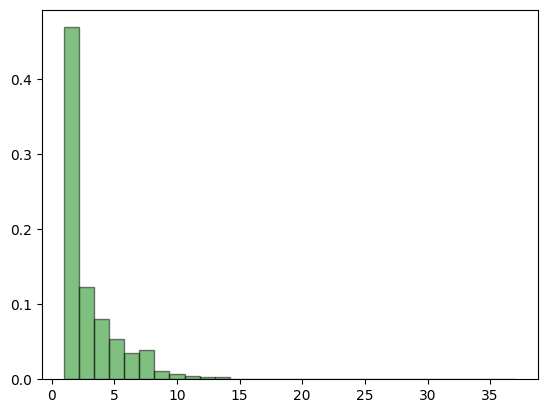

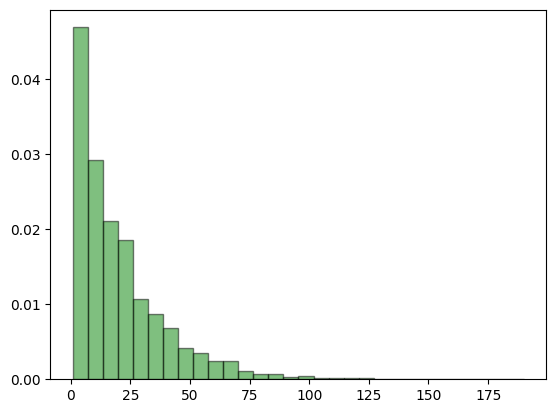

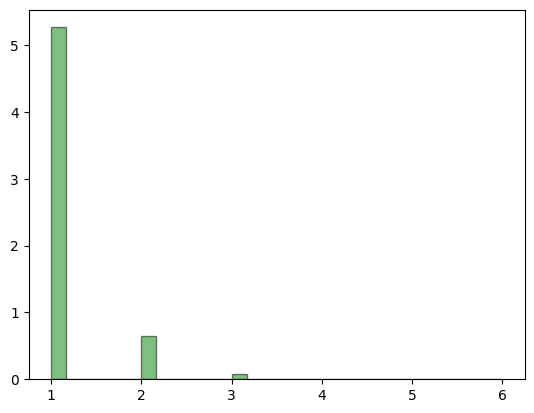

In [10]:
for mean, variance, data_set in zip(means, variances, data_sets):
    sample = geometric_distribution(mean, variance, len(data_set))


In [11]:
def binomial_distribution(mean: float, variance: float, size: int, data_set_name: str):
    try: 
        p = variance ** 2 / mean
        n = round(mean / p)
        sample = np.random.binomial(n, p, size)
        plt.hist(sample, bins=30, density=True, alpha=0.5, color='g', edgecolor='black')

    except Exception as e:
        print(f"Cannot create plot: {e}")
    finally:
        plt.xlabel('Values')
        plt.ylabel('Numbers')
        plt.title(f'Binomial for {data_set_name}')
        plt.show()

In [12]:
for mean, variance, data_set in zip(means, variances, data_sets):
    binomial_distribution(mean, variance, len(data_set))

-0.43902988695375167


ValueError: p < 0, p > 1 or p is NaN

In [ ]:
def exponential_distribution(mean: float, variance: float, n: int, data_set_name: str) -> list[float]:
    try:
        samples = [random.expovariate(1 / mean) for _ in range(n)]
        plt.hist(samples, bins=150, density=True, alpha=0.5, color='g', edgecolor='black')
    
        x = np.linspace(0, max(samples), 1000)
        y = (1 / mean) * np.exp(-x / mean)
        plt.plot(x, y, color='r', linewidth=2)
    
        plt.show()
    except Exception as e:
        print(f"Cannot create plot: {e}")
    
    finally:
        plt.xlabel('Values')
        plt.ylabel('Numbers')
        plt.title(f'Exponential for {data_set_name}')
        plt.show()

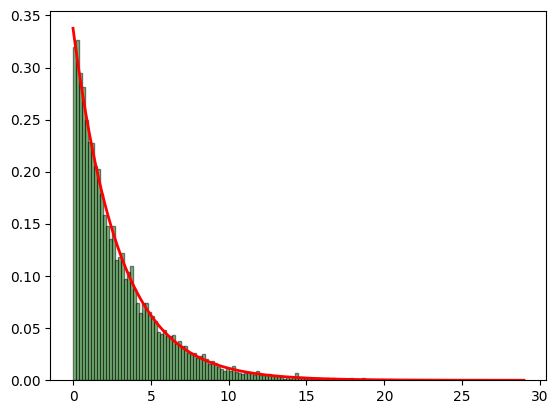

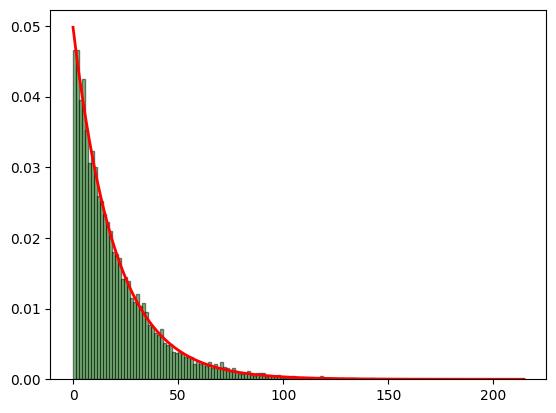

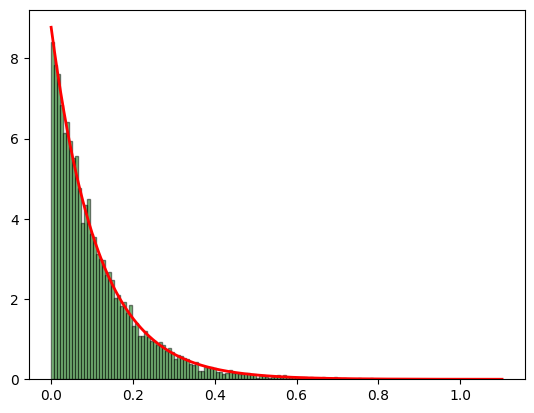

In [ ]:
for mean, variance, data_set in zip(means, variances, data_sets):
    exponential(mean, 10000)

In [ ]:
def normal_distribution(mean: float, variance: float, size: int, data_set_name: str):
    try:
        data = np.random.normal(mean, variance, size)

        plt.hist(data, bins=50, density=True, alpha=0.7, color='blue')

        x = np.linspace(mean - 4*variance, mean + 4*variance, 100)
        y = np.exp(-(x - mean)**2 / (2 * variance**2)) / (variance * np.sqrt(2 * np.pi))
        plt.plot(x, y, color='red')
        
    except Exception as e:
        print(f"Cannot create plot: {e}")
    
    finally:
        plt.xlabel('Values')
        plt.ylabel('Numbers')
        plt.title(f'normal for {data_set_name}')
        plt.show()

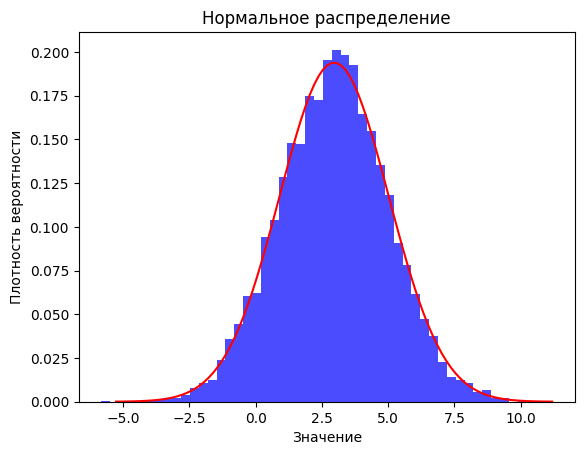

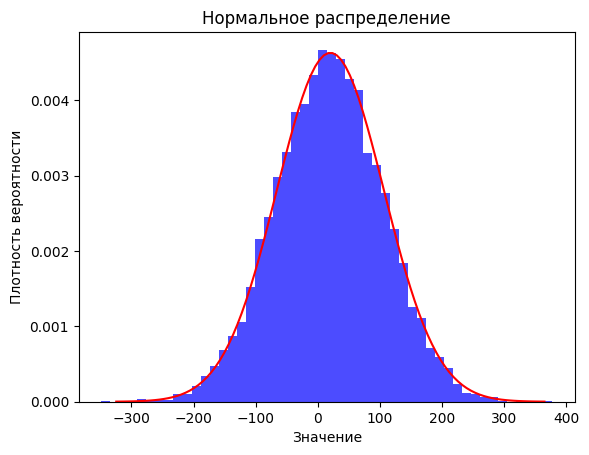

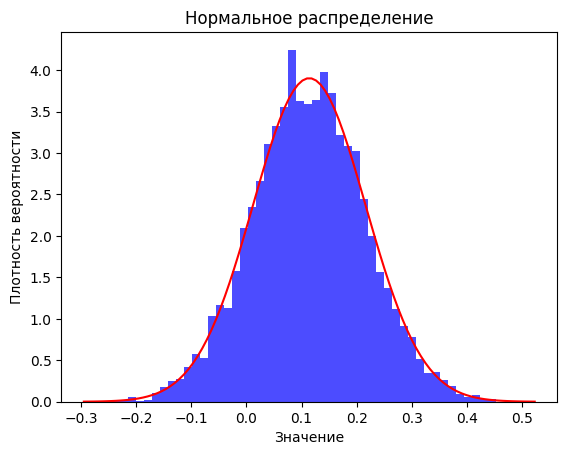

In [ ]:
for mean, variance, data_set in zip(means, variances, data_sets):
    sample = normal(mean, variance, 10000)

In [ ]:
def uniform_distribution(mean: float, variance: float, size: int, data_set_name: str):
    try:
        
        var_sqrt = np.sqrt(variance)
        a = mean - np.sqrt(3) * var_sqrt
        b = mean + np.sqrt(3) * var_sqrt
        samples = np.random.uniform(a, b, size)
        plt.hist(samples, bins='auto', density=True, alpha=0.7, color='g', edgecolor='black')
    except Exception as e:
        print(f"Cannot create plot: {e}")
    finally:
        plt.xlabel('Values')
        plt.ylabel('Numbers')
        plt.title(f'Uniform for {data_set_name}')
        plt.show()


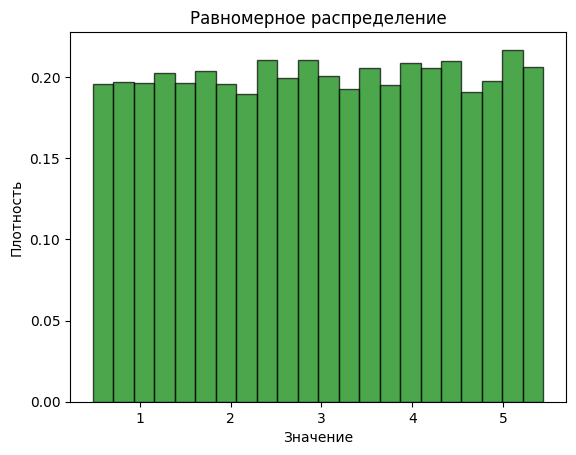

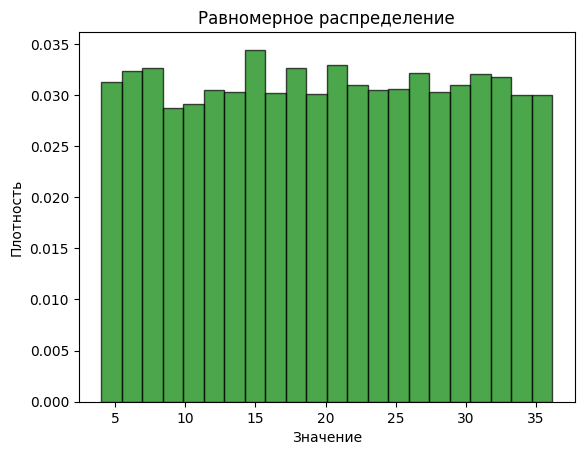

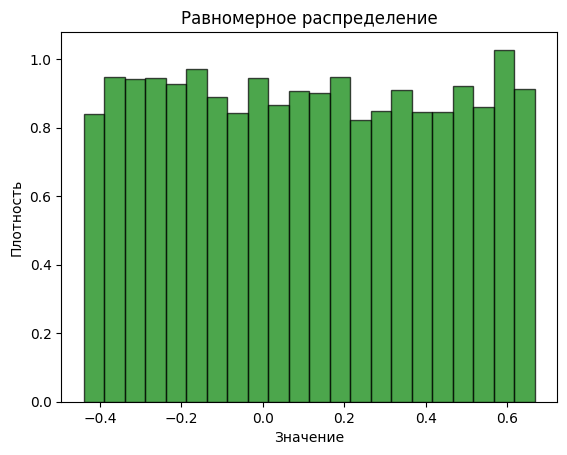

In [ ]:
for mean, variance, data_set in zip(means, variances, data_sets):
    sample = uniform_distribution(mean, variance, 10000)

In [ ]:
def poisson_distribution(mean: float, variance: float, size: int, data_set_name: str):
    try:
        x = np.arange(0, size)  # Диапазон значений
        sample = np.random.poisson(mean, size)

        plt.bar(x, sample)
    except Exception as e:
        print(f"Cannot create plot: {e}")
    finally:
        plt.xlabel('Values')
        plt.ylabel('Numbers')
        plt.title(f'Poisson for {data_set_name}')
        plt.show()

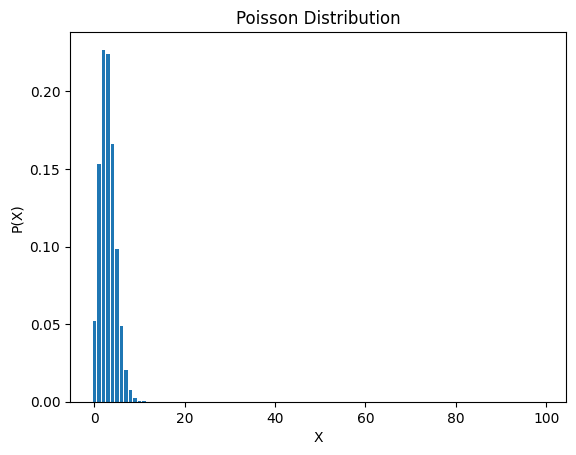

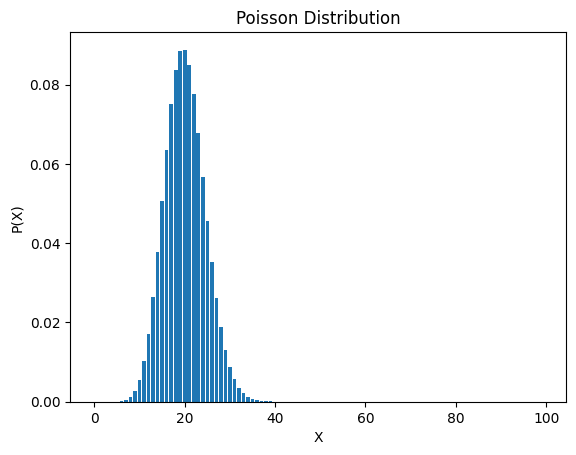

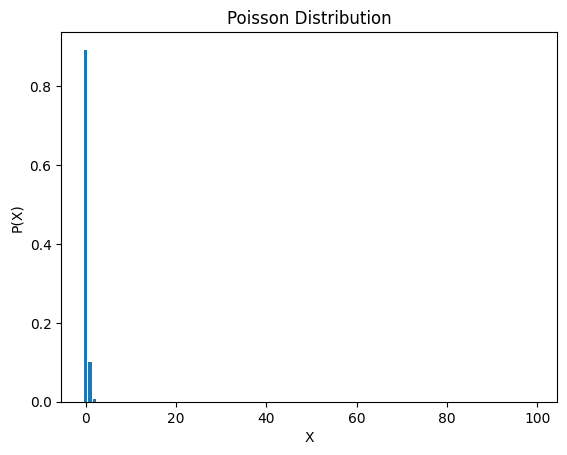

In [ ]:
for mean, variance, data_set in zip(means, variances, data_sets):
    sample = poisson(mean, variance, 100)